## Predicting Subreddit Using Decision Tree and Random Forest

### Featuere Importance Plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

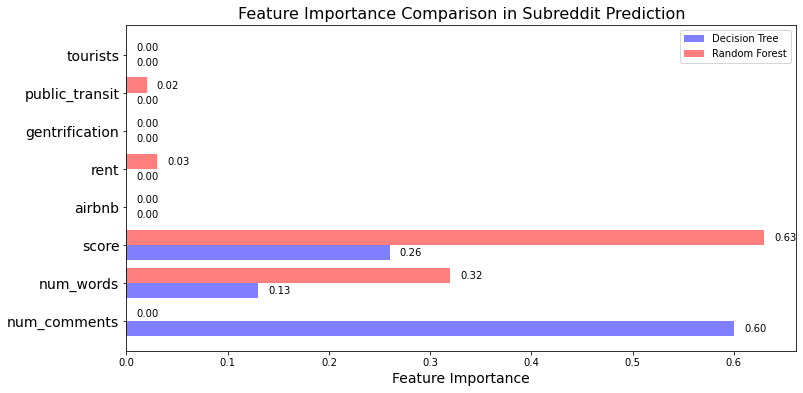

In [10]:
# Feature names and their corresponding importances from both models
features = ['num_comments', 'num_words', 'score', 'airbnb', 'rent', 'gentrification', 'public_transit', 'tourists']
dt_importances = [0.60, 0.13, 0.26, 0.00, 0.00, 0.00, 0.00, 0.00]
rf_importances = [0.00, 0.32, 0.63, 0.00, 0.03, 0.00, 0.02, 0.00]

# Create a DataFrame
df = pd.DataFrame({'Feature': features, 'Decision Tree': dt_importances, 'Random Forest': rf_importances})
#df = df.sort_values(by='Feature', ascending=False)
# Setting the positions and width for the bars
pos = list(range(len(df['Feature'])))
width = 0.4

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Create a horizontal bar for Decision Tree data and another one for Random Forest data
bars_dt = plt.barh([p - width/2 for p in pos], df['Decision Tree'], height=width, alpha=0.5, color='blue', label='Decision Tree')
bars_rf = plt.barh([p + width/2 for p in pos], df['Random Forest'], height=width, alpha=0.5, color='red', label='Random Forest')

# Anotate the bars with the feature values
for bar in bars_dt + bars_rf:
    value = bar.get_width()  # Get the value of the bar
    text = f'{value:.2f}'  # Format the value as a string
    ax.text(value + 0.01, bar.get_y() + bar.get_height()/2, text, va='center')

# Set the x axis label
ax.set_xlabel('Feature Importance', fontsize=14)

# Set the chart's title
ax.set_title('Feature Importance Comparison in Subreddit Prediction', fontsize=16)

# Set the y label
ax.set_yticks([p for p in pos])
ax.set_yticklabels(df['Feature'], fontsize=14)

# add legend
plt.legend(['Decision Tree', 'Random Forest'], loc='upper right')
plt.show()
fig.savefig('../../data/plots/feature_importance_comparison_subreddit.png', dpi=300)


The above plot illustrates that 'num_comments' is the most significant feature in predicting subreddit categories for both the Decision Tree and Random Forest models, followed by 'num_words', which also shows substantial importance. Other features such as 'score', 'rent', 'airbnb', 'gentrification', 'public_transit', and 'tourists' have little to no impact on the model's predictions, with some being completely disregarded by both models. The consistency in feature importance for 'num_comments' and 'num_words' across both models suggests that these factors are likely strong predictors for the subreddit classification task.

### Results Table for Decision Tree and Random Forest Models

In [18]:
# Define the metrics for both models 
dt_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': 0.43,
    'Weighted Precision': 0.41,
    'Weighted Recall': 0.43,
    'F1 Score': 0.40
}

rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': 0.40,
    'Weighted Precision': 0.39,
    'Weighted Recall': 0.40,
    'F1 Score': 0.36
}

# create a dataframe
metrics_df = pd.DataFrame([dt_metrics, rf_metrics])

# set column model as index
metrics_df.set_index('Model', inplace=True)

# Display the DataFrame
print(metrics_df)

               Accuracy  Weighted Precision  Weighted Recall  F1 Score
Model                                                                 
Decision Tree      0.43                0.41             0.43      0.40
Random Forest      0.40                0.39             0.40      0.36


The Decision Tree model outperforms the Random Forest model across all reported metrics, albeit by a small margin. This suggests that for this particular task, with the given features and dataset, the simpler Decision Tree model is slightly better suited than the more complex Random Forest model. However, the overall performance of both models is quite similar and relatively low, indicating either a challenging classification problem or that there may be room for improvement in model selection, feature engineering, or parameter tuning.

### Confusion Matrix for Decision Tree and Random Forest Models

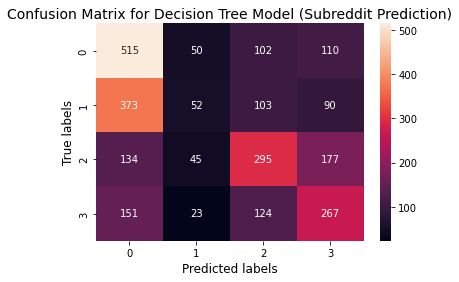

In [14]:
# read the data 
dt_df = pd.read_csv('../../data/pred_sub_dt.csv')
dt_df.head()
# set the true and predicted labels
true_labels = dt_df['label'].values
predicted_labels = dt_df['prediction'].values

# calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix for Decision Tree Model (Subreddit Prediction)', fontsize=14)
plt.show()
fig.savefig('../../data/plots/conf_matrix_dt_subreddit.png', dpi=300)

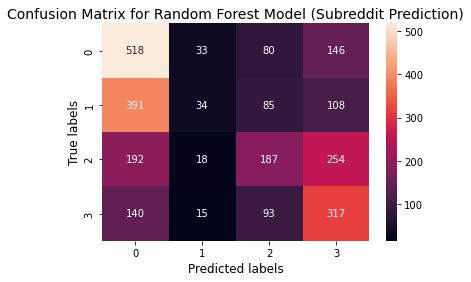

In [16]:
# read the data 
rf_df = pd.read_csv('../../data/pred_sub_rf.csv')

# set the true and predicted labels
true_labels = rf_df['label'].values
predicted_labels = rf_df['prediction'].values

# calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels',  fontsize=12)
plt.title('Confusion Matrix for Random Forest Model (Subreddit Prediction)', fontsize=14)
plt.show()
fig.savefig('../../data/plots/conf_matrix_rf_subreddit.png', dpi=300)

The Random Forest model has improved the classification for classes 0 and 3 significantly, with a slight improvement in class 1. However, for class 2, the Random Forest model has a lower number of correct predictions but a higher number of correct predictions for class 3, possibly due to the trade-off between these two classes. Misclassifications between classes 2 and 3 remain high in both models, suggesting that these classes are more difficult to distinguish from each other with the given features. Overall, the Random Forest model seems to generalize better and may be more robust than the single Decision Tree model, but there might still be room for improvement, especially in distinguishing between classes 2 and 3.

# Predicting Sentiment Using SVM and Random Forest Models

### Featuere Importance Plot

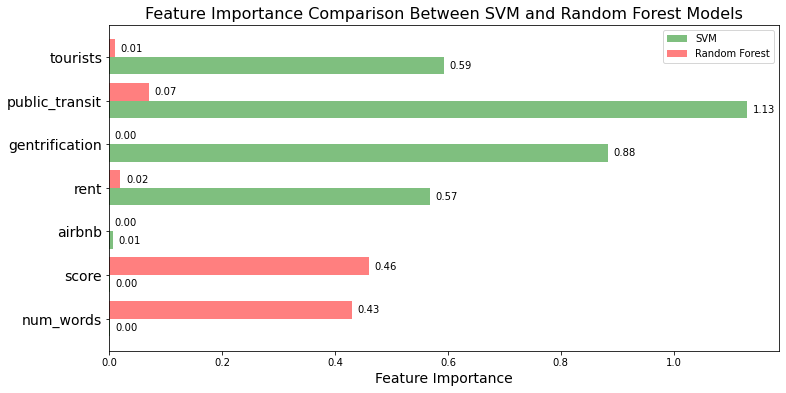

In [18]:
# Feature names and their corresponding importances from both models
features = ['num_words', 'score', 'airbnb', 'rent', 'gentrification', 'public_transit', 'tourists']
svm_importances = [0.0009, 0.0014, 0.0071, 0.5686, 0.8830, 1.1296, 0.5926]
rf_importances = [0.43, 0.46, 0.00, 0.02, 0.00, 0.07, 0.01]

# Create a DataFrame
df = pd.DataFrame({'Feature': features, 'SVM': svm_importances, 'Random Forest': rf_importances})
#df = df.sort_values(by='Feature', ascending=False)
# Setting the positions and width for the bars
pos = list(range(len(df['Feature'])))
width = 0.4

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Create a horizontal bar for SVM data and another one for Random Forest data
bars_dt = plt.barh([p - width/2 for p in pos], df['SVM'], height=width, alpha=0.5, color='green', label='SVM')
bars_rf = plt.barh([p + width/2 for p in pos], df['Random Forest'], height=width, alpha=0.5, color='red', label='Random Forest')

# Anotate the bars with the feature values
for bar in bars_dt + bars_rf:
    value = bar.get_width()  # Get the value of the bar
    text = f'{value:.2f}'  # Format the value as a string
    ax.text(value + 0.01, bar.get_y() + bar.get_height()/2, text, va='center')

# Set the x axis label
ax.set_xlabel('Feature Importance', fontsize=14)

# Set the chart's title
ax.set_title('Feature Importance Comparison Between SVM and Random Forest Models', fontsize=16)

# Set the y label
ax.set_yticks([p for p in pos])
ax.set_yticklabels(df['Feature'], fontsize=14)

# add legend
plt.legend(['SVM', 'Random Forest'], loc='upper right')
plt.show()
fig.savefig('../../data/plots/feature_importance_comparison_sentiment.png', dpi=300)

The chart indicates a discrepancy in how the SVM and Random Forest models weigh the importance of different features when predicting sentiment. The Random Forest model places a considerable emphasis on "public_transit," "rent," and "score," while the SVM model considers "score" and "num_words" to be the most influential features. This difference may stem from the inherent characteristics of how these models process features and make decisions. It also highlights that feature importance is model-dependent and can vary significantly between different types of models.

### Results Table for SVM and Random Forest Models

In [17]:
# Define the performance metrics from the provided results
svm_metrics = {
    'Model': 'SVM',
    'areaUnderROC': 0.51,
    'areaUnderPR': 0.41,
    'Accuracy': 0.68,
    'Weighted Precision': 0.62,
    'Weighted Recall': 0.68,
    'F1 Score': 0.57
}

rf_metrics = {
    'Model': 'Random Forest',
    'areaUnderROC': 0.52,
    'areaUnderPR': 0.46,
    'Accuracy': 0.68,
    'Weighted Precision': 0.65, 
    'Weighted Recall': 0.68,    
    'F1 Score': 0.58            
}

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame([svm_metrics, rf_metrics])

# Set the 'Model' column as the index of the DataFrame
metrics_df.set_index('Model', inplace=True)

# Show the DataFrame
print(metrics_df)

               areaUnderROC  areaUnderPR  Accuracy  Weighted Precision  \
Model                                                                    
SVM                    0.51         0.41      0.68                0.62   
Random Forest          0.52         0.46      0.68                0.65   

               Weighted Recall  F1 Score  
Model                                     
SVM                       0.68      0.57  
Random Forest             0.68      0.58  


The comparison of SVM and Random Forest models for sentiment prediction shows that both models exhibit similar accuracy at 0.68, suggesting an equal proportion of correct predictions for sentiment classification. However, the Random Forest slightly surpasses the SVM in discriminative power, as indicated by marginally higher areaUnderROC and areaUnderPR scores. The SVM model, for which more performance metrics are available, shows a decent balance between precision and recall with a weighted precision of 0.62 and an F1 score of 0.57.

### Confusion Matrix for SVM and Random Forest Models

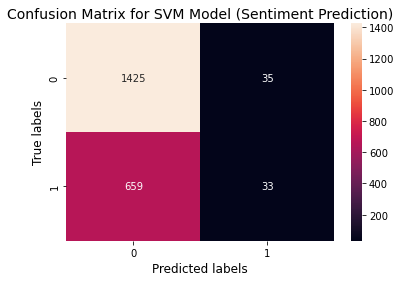

In [19]:
# read the data 
svm_df = pd.read_csv('../../data/pred_sent_svm.csv')
# set the true and predicted labels
true_labels = svm_df['label'].values
predicted_labels = svm_df['prediction'].values

# calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix for SVM Model (Sentiment Prediction)', fontsize=14)
plt.show()
fig.savefig('../../data/plots/conf_matrix_svm_sentiment.png', dpi=300)

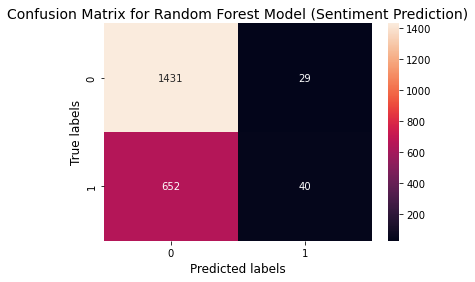

In [20]:
# read the data 
rf_df2 = pd.read_csv('../../data/pred_sent_rf.csv')
# set the true and predicted labels
true_labels = rf_df2['label'].values
predicted_labels = rf_df2['prediction'].values

# calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix for Random Forest Model (Sentiment Prediction)', fontsize=14)
plt.show()
fig.savefig('../../data/plots/conf_matrix_rf_sentiment.png', dpi=300)

The Random Forest model has a slightly higher number of true positives for Class 0 and a lower number of false negatives for Class 1, indicating a marginally better performance in correctly classifying Class 0. The SVM model has fewer false positives for Class 1, indicating a marginally better specificity for Class 1. Both models have a high true positive rate, but the Random Forest model has a slightly better performance overall, with more correct predictions for Class 0 and fewer misclassifications for Class 1